In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer

In [2]:
df = pd.read_csv('yelp.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate.]Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
import string
import re

def clean_text(text):
    text = text.translate(string.punctuation)
    
    text = text.lower().split()
    
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    text = " ".join(text)
    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text) 
    
    return text

In [5]:
yelp_data = df[['business_id', 'user_id', 'stars', 'text']]

In [6]:
%%time
yelp_data['text'] = yelp_data['text'].apply(clean_text)

CPU times: user 1.82 s, sys: 114 ms, total: 1.93 s
Wall time: 1.95 s


/home/xprilion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
yelp_data['textlen'] = yelp_data['text'].apply(len)

/home/xprilion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

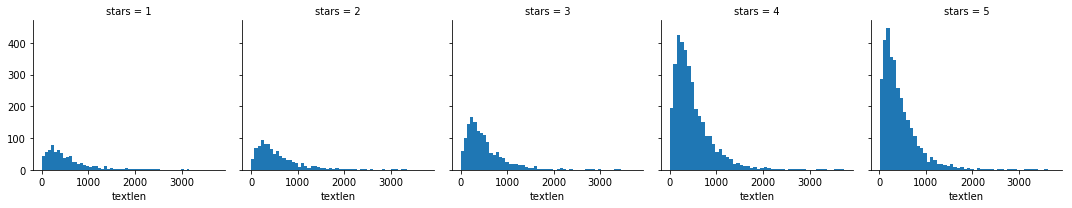

In [11]:
g = sns.FacetGrid(data=yelp_data, col='stars')
g.map(plt.hist, 'textlen', bins=50)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(yelp_data['text'], df['business_id'], test_size = 0.2) 

In [8]:
user_df = yelp_data[['user_id','text']]
business_df = yelp_data[['business_id', 'text']]

In [9]:
user_df = user_df.groupby('user_id').agg({'text': ' '.join})
business_df = business_df.groupby('business_id').agg({'text': ' '.join})

In [10]:
#userid vectorizer
user_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
user_vectors = user_vectorizer.fit_transform(user_df['text'])
user_vectors.shape

(6403, 1000)

In [11]:
#Business id vectorizer
business_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
business_vectors = business_vectorizer.fit_transform(business_df['text'])
business_vectors.shape

(4174, 1000)

# Matrix Factorization

In [12]:
userRatings = pd.pivot_table(yelp_data, values='stars', index=['user_id'], columns=['business_id'])
userRatings.shape

(6403, 4174)

In [13]:
userRatings.head()

business_id,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-1N0Z3uM8xbxKS8XiAnaog,-34jE_5dujSWMIOBudQsiQ,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,-4A5xmN21zi_TXnUESauUQ,-5EWgRkudDlcCbQSIL_twA,-5rFC4EVrT-v8g1PSEf6Xg,-6O53B-ksqSKzWM6Y9moEQ,...,zrO-RPR3fSdA7sI-IRGWIQ,zruUQvFySeXyEd7_rQixBg,zsApK-QhjBm2mTqq4VWYPQ,zsWJEyP8YyJkux0muGtiVw,zw2iJahOnSxlzmRlF4al6g,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyYRWnimLbQt9aCCI_2MZw
user_id,,,,,,,,,,,,,,,,,,,,,
--65q1FpAL_UQtVZ2PTGew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--VxRvXk3b8FwsSbC2Zpxw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--rlgfAvvi0BtfRDA1p-VQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2S6keboidRPly-h5lBfkA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2XA34d6OGYEUuzqC7yhBg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
P = pd.DataFrame(user_vectors.toarray(), index=user_df.index, columns=user_vectorizer.get_feature_names())
Q = pd.DataFrame(business_vectors.toarray(), index=business_df.index, columns=business_vectorizer.get_feature_names())


In [15]:
Q.head()

,!,!!,!!!,!.,!..,',",",-,--,.,...,year,years,yelp,yes,yet,yogurt,you,young,yum,yummy
business_id,,,,,,,,,,,,,,,,,,,,,
-0QBrNvhrPQCaeo7mTo0zQ,0.050891,0.0,0.0,0.0,0.0,0.218745,0.147773,0.00000,0.000000,0.406785,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
-0bUDim5OGuv8R0Qqq6J4A,0.000000,0.0,0.0,0.0,0.0,0.000000,0.155448,0.00000,0.000000,0.142637,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
-1N0Z3uM8xbxKS8XiAnaog,0.054592,0.0,0.0,0.0,0.0,0.000000,0.317037,0.00000,0.000000,0.145455,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.174637,0.0,0.0,0.000000
-34jE_5dujSWMIOBudQsiQ,0.000000,0.0,0.0,0.0,0.0,0.000000,0.078280,0.00000,0.000000,0.287315,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
-3WVw1TNQbPBzaKCaQQ1AQ,0.073878,0.0,0.0,0.0,0.0,0.095264,0.375409,0.07081,0.032003,0.442890,...,0.0,0.047447,0.0,0.026701,0.0,0.0,0.000000,0.0,0.0,0.028879


In [16]:
def matrix_factorization(R, P, Q, steps=1, gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        
    return P,Q


In [17]:
%%time
P, Q = matrix_factorization(userRatings, P, Q, steps=1, gamma=0.001,lamda=0.02)

CPU times: user 10min 28s, sys: 1.14 s, total: 10min 29s
Wall time: 10min 30s


In [19]:
import pickle
output = open('api/model.pkl', 'wb')
pickle.dump(P,output)
pickle.dump(Q,output)
pickle.dump(user_vectorizer,output)
output.close()

## Prediction for input text

In [20]:
words = 'I am intrested in vegeterian restaurants'
test_df= pd.DataFrame([words], columns=['text'])
test_df['text'] = test_df['text'].apply(clean_text)
test_vectors = user_vectorizer.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index, columns=user_vectorizer.get_feature_names())

predictItemRating=pd.DataFrame(np.dot(test_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Rating'],ascending=[0])[:10]
topRecommendations


,Rating
business_id,
O-SE2b4SncLzk6jnPd8g6Q,0.479619
R4zcw0jq-gMgDtPyCjwnew,0.365113
J7ZNnzbCoyMqd-y608wl6A,0.318579
GzWiVvE6JDdBNowNVshItA,0.290485
Jsrc6etsr4hM4OaVuGUyTg,0.276951
GjG2_JvHg6ISrLchOag_lA,0.267077
tyHtzC4k-MvsTZOBZ8YaWw,0.255198
cKxXBvOithS-Ic5KnhEKrg,0.249707
ZXvxDxhNz8XSe59oj2QlZg,0.245771


## Prediction and Accuracy test on Validation set

In [21]:
f = open('api/model.pkl', 'rb')
P, Q, user_vectorizer = pickle.load(f), pickle.load(f), pickle.load(f)

In [22]:
test_df = pd.DataFrame([words], columns=['text'])
test_df['text'] = test_df['text'].apply(clean_text)
test_vectors = user_vectorizer.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index,
                         columns=user_vectorizer.get_feature_names())

In [23]:
test_df = X_valid.to_frame()
test_df['text'] = test_df['text'].apply(clean_text)
test_vectors = user_vectorizer.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index,
                         columns=user_vectorizer.get_feature_names())


In [24]:
y_pred = []
for key, row in test_v_df.iterrows():
    predictItemRating=pd.DataFrame(np.dot(row,Q.T),index=Q.index,columns=['Rating'])
    topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Rating'],ascending=[0])[:1]
    y_pred.append(topRecommendations.index[0])

In [25]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy for validation set is: ',accuracy_score(y_valid, y_pred))

Accuracy for validation set is:  0.871
